In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

In [2]:
_ = load_dotenv()

### Dataset overview
Dataset preliminary analysis to understand the structure and contents of the data.
1. Check columns and data types
2. Check missing values.
3. Duplicate rows
4. Check data distribution
5. Check for target distribution and imbalance
6. Check for correlations

In [3]:
data_path = os.getenv("DATA_PATH")
print(data_path)

data_path = os.path.join("..", data_path)

if os.path.exists(data_path):
    df = pd.read_csv(data_path, index_col=0)
    print(f"Data loaded successfully: {data_path}")
else:
    print(f"Data file not found at: {data_path}")

data/snappt_data_scientist_interview_dataset.csv
Data loaded successfully: ..\data/snappt_data_scientist_interview_dataset.csv


In [4]:
display(df.head(10))

,id,label,edge_noise,text_density,grayscale_variance,alpha_channel_density,unique_font_colors,reported_income
0,0013bac3-6588-46ba-8b6c-5bf9af4c3322,CLEAN,NaN,8.571591,8.571591,97.189950,0.0,1624.63
1,01ad459b-59bf-47ef-b659-854a93260764,CLEAN,49.001901,7.964787,7.964787,75.089942,5.0,2377.50
2,01cec16b-ebf8-4fd9-bf3d-d847cae994f4,CLEAN,50.387574,10.809738,10.809738,68.735470,0.0,2305.21
3,01fc29d4-333f-4056-99de-ef2d40aa35bf,CLEAN,57.728713,8.092370,8.092370,67.652785,5.0,1925.01
4,02f74797-a55d-4760-ac62-fec200921d00,CLEAN,68.395001,7.799680,7.799680,79.557896,1.0,1467.54
5,03f48927-2c11-4e0b-a39d-e76164a6fd0e,CLEAN,33.909665,10.352633,10.352633,69.391240,5.0,1547.89
6,04af83c1-f99b-4f6f-812a-bdc36dc7d0cf,CLEAN,53.162759,9.562959,9.562959,85.691833,3.0,1971.42
7,04b73759-b973-44ee-9e02-ea8e7d5c40c1,EDITED,19.848541,9.759607,9.759607,16.180360,4.0,3795.71
8,04ce1ec5-a813-4922-80ee-d24166cea54c,CLEAN,57.116586,11.093181,11.093181,109.777354,5.0,NaN
9,05bb7361-a984-4f4d-a016-2190cfc3090f,EDITED,21.331663,10.480417,10.480417,19.146305,3.0,2657.91


Datasets totals 8 columns
- `id`: Unique identifier for each transaction.
- `label`: fraudulent (EDITED) or not (CLEAN).
### label	edge_noise	text_density	grayscale_variance	alpha_channel_density	unique_font_colors	reported_income
- `edge_noise`: Measure of noise in the edges of the transaction image.
- `text_density`: Density of text in the transaction image.
- `grayscale_variance`: Variance in grayscale values of the transaction image.
- `alpha_channel_density`: Density of the alpha channel in the transaction image.
- `unique_font_colors`: Number of unique font colors used in the transaction image.
- `reported_income`: Reported income of the user associated with the transaction.

In [5]:
# datatypes
display(df.dtypes.reset_index())

,index,0
0,id,object
1,label,object
2,edge_noise,float64
3,text_density,float64
4,grayscale_variance,float64
5,alpha_channel_density,float64
6,unique_font_colors,float64
7,reported_income,float64


In [6]:
# dataset size
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 500 rows and 8 columns.


Datasets is relatively small.

In [7]:
df[df.isnull().any(axis=1)].shape

(25, 8)

In [40]:
# check missing values for each column
missing_values = df.isnull().sum()

display(missing_values)

# very few missing values

# check how many rows have duplicates

display(df[df.isnull().any(axis=1)])

id                       5
label                    4
edge_noise               3
text_density             2
grayscale_variance       3
alpha_channel_density    4
unique_font_colors       3
reported_income          1
dtype: int64

,id,label,edge_noise,text_density,grayscale_variance,alpha_channel_density,unique_font_colors,reported_income
0,0013bac3-6588-46ba-8b6c-5bf9af4c3322,CLEAN,NaN,8.571591,8.571591,97.189950,0.0,1624.63
8,04ce1ec5-a813-4922-80ee-d24166cea54c,CLEAN,57.116586,11.093181,11.093181,109.777354,5.0,NaN
16,NaN,CLEAN,39.443167,9.159320,9.159320,58.613817,3.0,1913.65
62,23f22cce-0d48-42c9-8e7c-3036893fb593,NaN,54.221345,9.529006,9.529006,54.480233,3.0,1658.46
71,27900013-91eb-42e1-b895-741921eab55a,CLEAN,NaN,8.953299,8.953299,59.218590,4.0,2485.72
76,NaN,CLEAN,46.476067,13.090996,13.090996,107.362424,2.0,1735.14
156,NaN,CLEAN,66.546477,11.149656,11.149656,67.648258,4.0,2099.28
176,5a0a94f4-efc0-4a18-afda-52b668c67c67,CLEAN,43.745117,8.703434,8.703434,45.589807,NaN,1738.15
188,5f2d5caf-9d12-4a00-9eda-ee5f04c103ba,CLEAN,34.924049,NaN,12.105105,64.450252,3.0,2188.01
217,6aa59308-04c6-4ca5-8a12-b323c2cfa509,CLEAN,37.493700,7.892381,7.892381,NaN,2.0,2024.63


1. Nulls in id columns coudl be ingored for now, unless they are duplicated rows
2. noise, text_density, grayscale_variance, alpha_channel_density and unique font_colores that have nan could be incorrect output or np.inf of an image processing algorithm.
3. nan reported_income could be actual people that did not report it due to not having income due to being unemployed.
4. Nan in label column should be dropped as we do not know if they are fraud or not.

In [44]:
# check nulls in labels
if df["label"].isnull().any():
    print("Null values found in labels. Dropping rows with null labels.")
    df = df.dropna(subset=["label"])

Null values found in labels. Dropping rows with null labels.


In [41]:
# check for duplicated IDS
duplicated_ids = df[df.duplicated(subset=["id"], keep=False)]
if not duplicated_ids.empty:
    print("Duplicated IDs found:")
    display(duplicated_ids)

Duplicated IDs found:


,id,label,edge_noise,text_density,grayscale_variance,alpha_channel_density,unique_font_colors,reported_income
16,NaN,CLEAN,39.443167,9.159320,9.159320,58.613817,3.0,1913.65
76,NaN,CLEAN,46.476067,13.090996,13.090996,107.362424,2.0,1735.14
156,NaN,CLEAN,66.546477,11.149656,11.149656,67.648258,4.0,2099.28
253,NaN,EDITED,14.663435,8.740984,8.740984,5.113676,3.0,2813.96
318,NaN,CLEAN,39.872181,9.078202,9.078202,84.293155,2.0,1820.37


Only duplicateds IDS are the nan `id` rows.

In [42]:
# check for duplicated vaues in the rest of the columns
no_id_df = df.drop(columns=["id"])
duplicated_rows = no_id_df[no_id_df.duplicated(keep=False)]
if not duplicated_rows.empty:
    print("Duplicated rows found:")
    display(duplicated_rows)
else:
    print("No duplicated rows found in the dataset.")

No duplicated rows found in the dataset.


label
CLEAN     0.800403
EDITED    0.199597
Name: proportion, dtype: float64


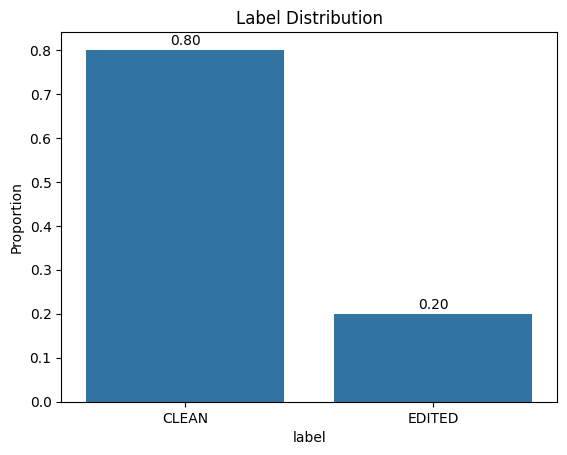

In [43]:
# label distribution using value counts and barplot seaborn
label_counts = df["label"].value_counts(normalize=True)
print(label_counts)
ax = sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel("label")
plt.ylabel("Proportion")
plt.title("Label Distribution")

# Add data labels on top of bars
for i, v in enumerate(label_counts.values):
    ax.text(i, v + 0.005, f"{v:.2f}", ha="center", va="bottom")

plt.show()

Datasets is imbalanced with 80% of transactions being non-fraudulent and 20% being fraudulent.

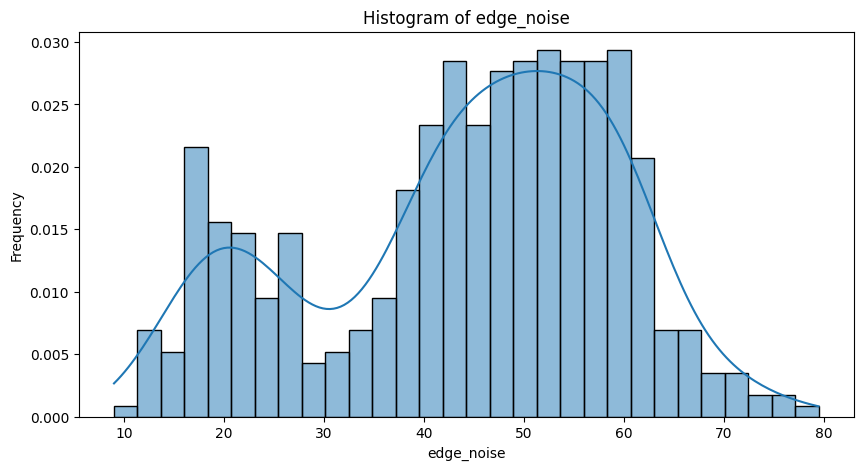

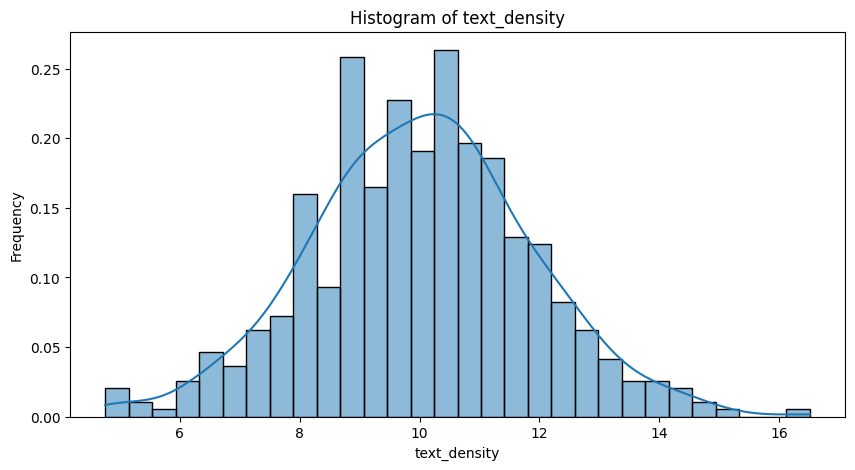

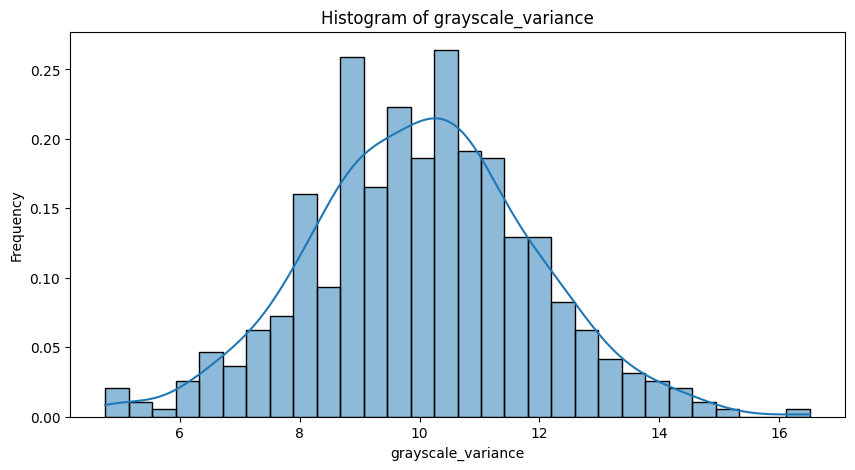

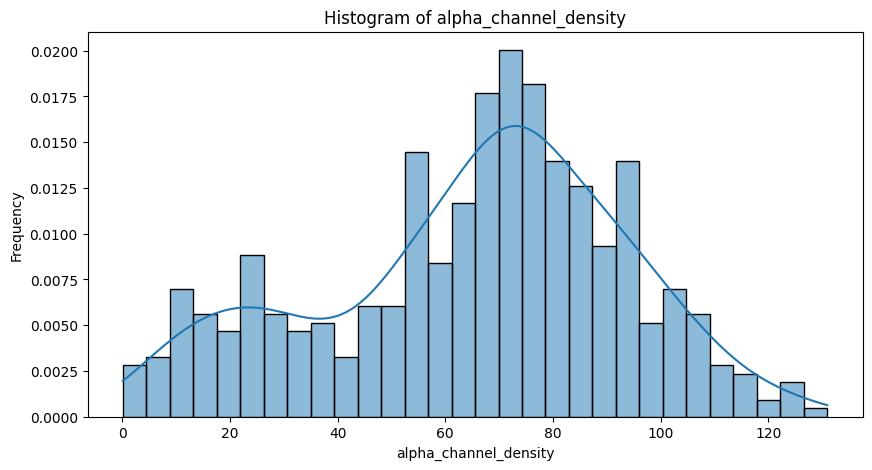

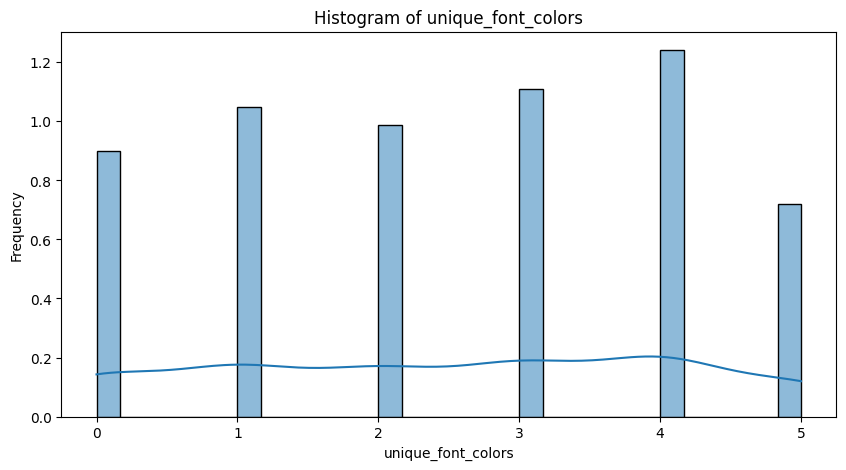

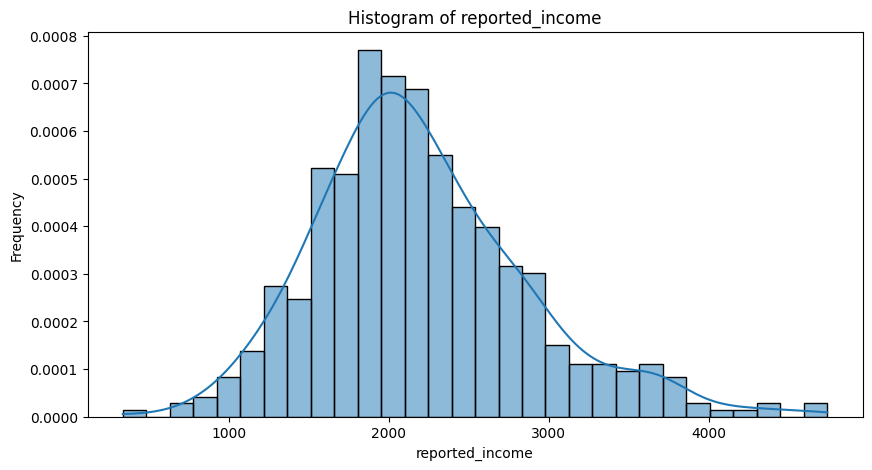

In [45]:
# histograms for all columns except label and id
for column in df.columns:
    if column not in ["label", "id"]:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column], kde=True, bins=30, stat="density")
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

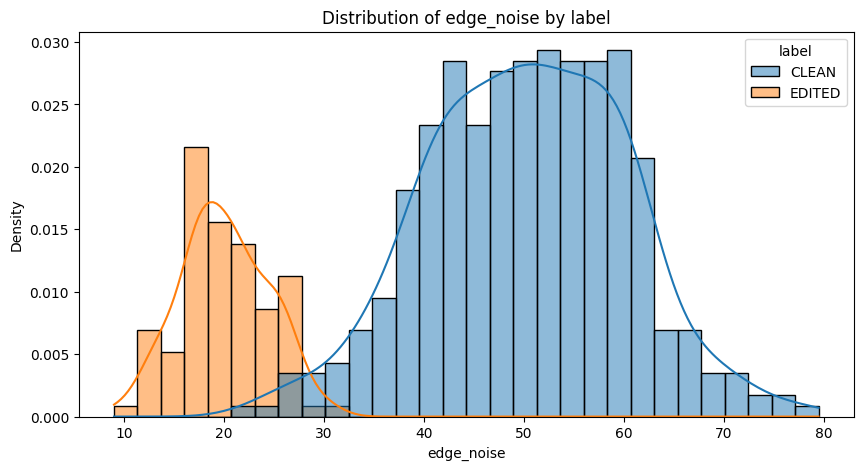

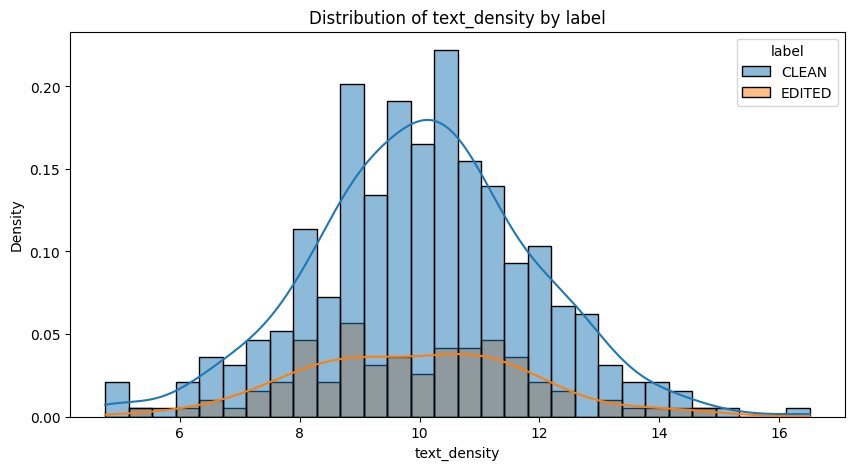

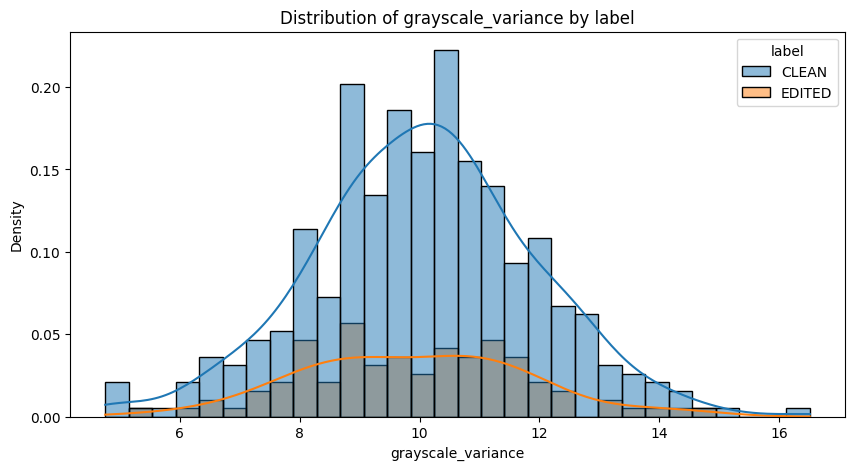

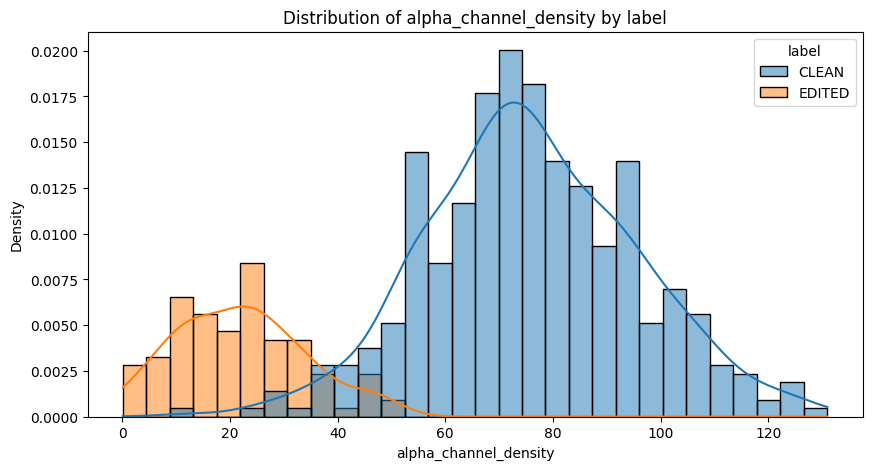

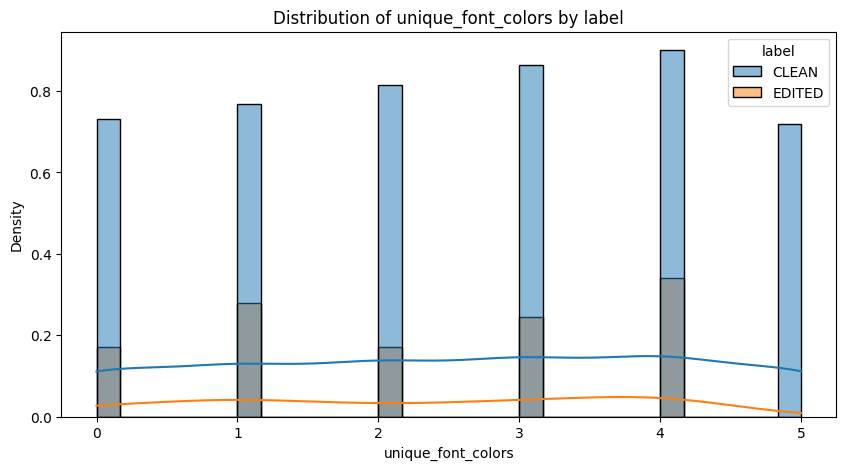

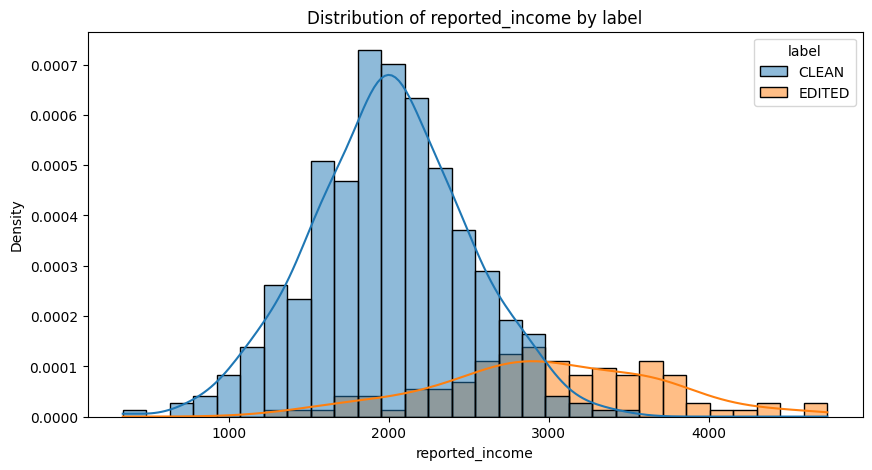

In [46]:
# distributions but with hue by label
for column in df.columns:
    if column not in ["label", "id"]:
        plt.figure(figsize=(10, 5))
        sns.histplot(df, x=column, hue="label", kde=True, bins=30, stat="density")
        plt.title(f"Distribution of {column} by label")
        plt.xlabel(column)
        plt.ylabel("Density")
        plt.show()

Bimodailty in some features is clearly correlated with the label. 

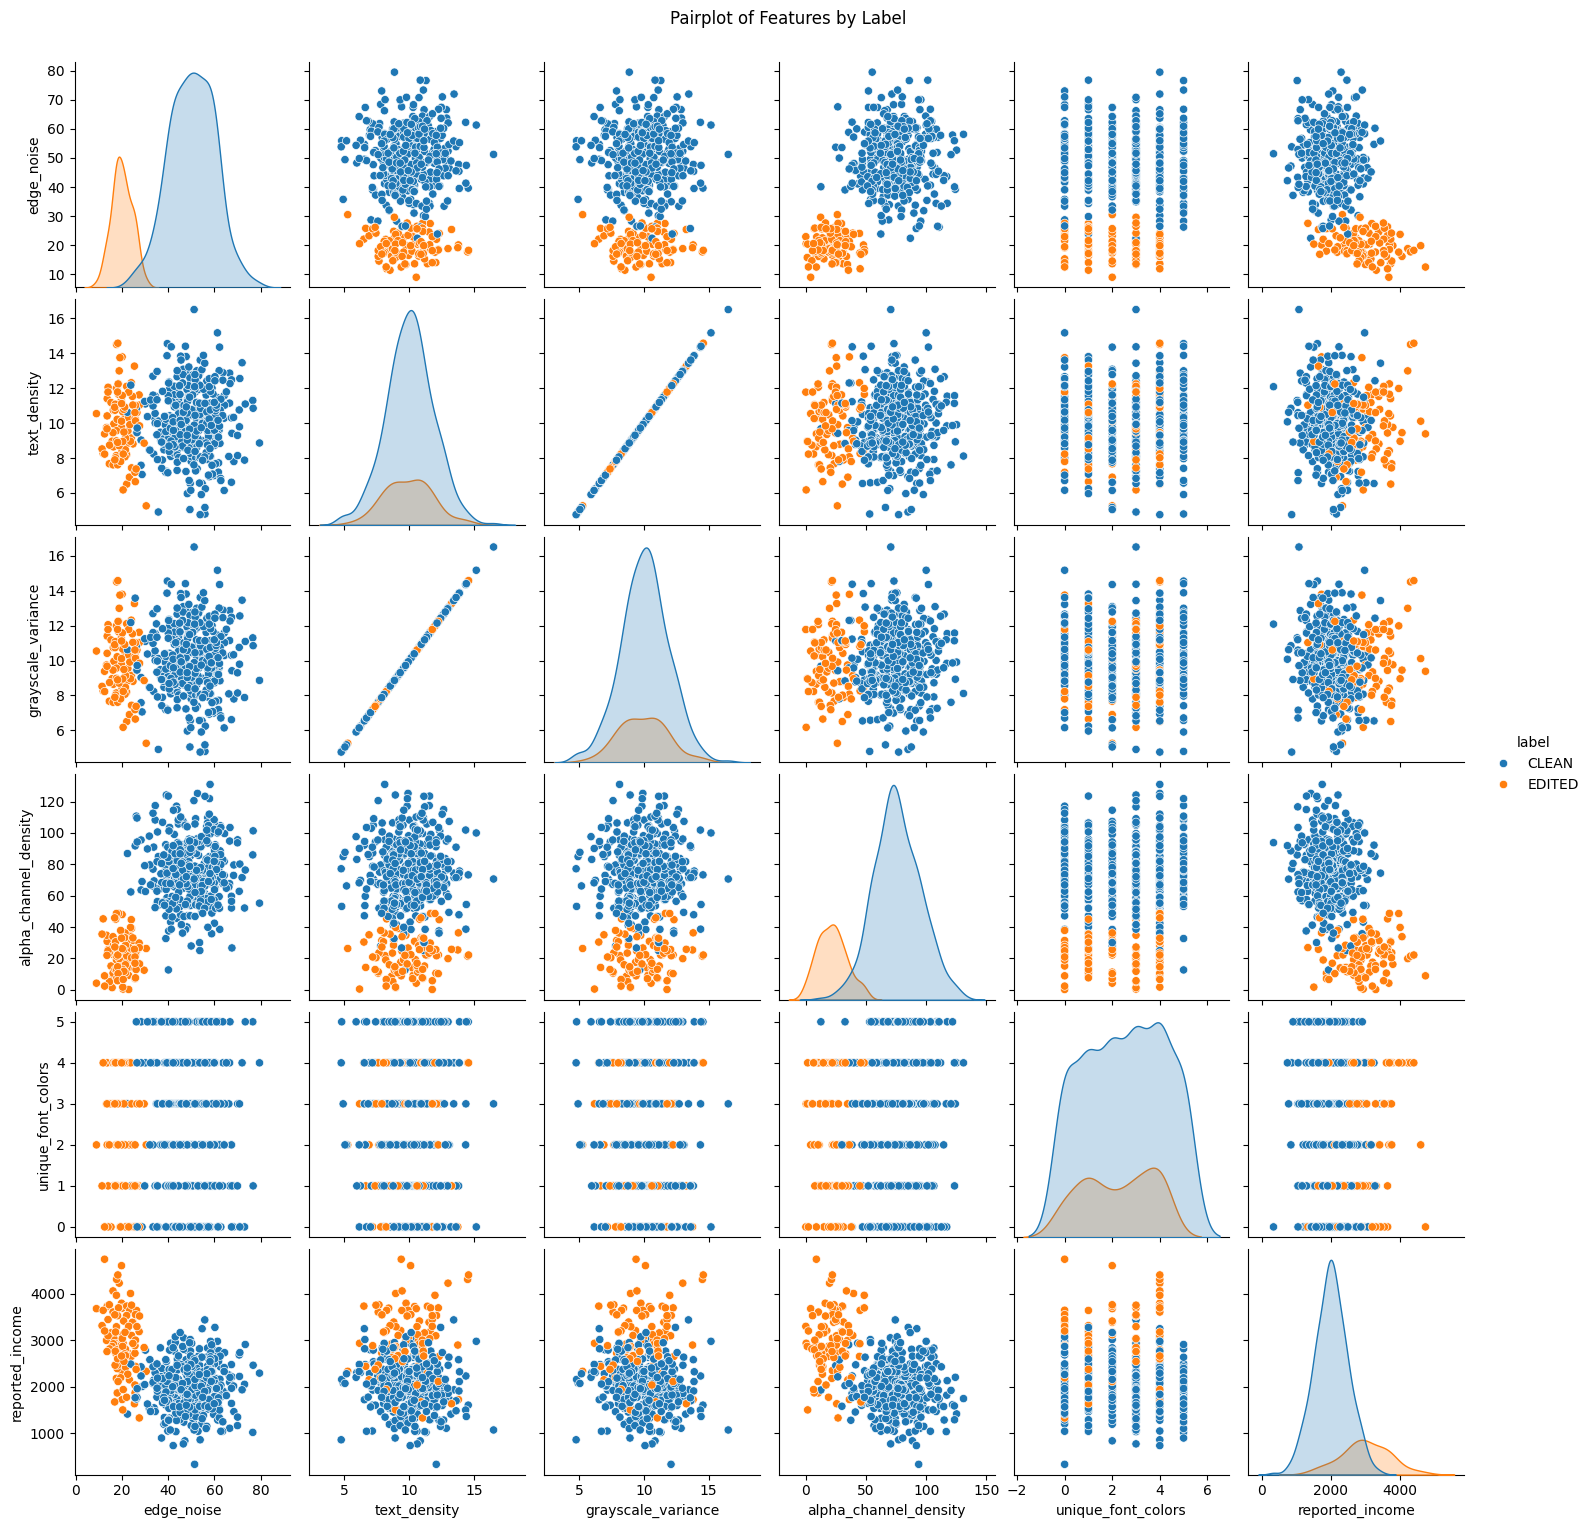

In [47]:
# build correlation plots with label

sns.pairplot(
    df,
    hue="label",
    vars=[col for col in df.columns if col not in ["id", "label"]],
    diag_kind="kde",
)
plt.suptitle("Pairplot of Features by Label", y=1.02)
plt.show()

In [ ]:
# edge noise + alpha_channel_density looks like a good linearly separable feature set to split the label almost perfectly. Similarly with reported_income + edge_noise.
# graycasle and text density are highly correlated, so we can drop one of them.
# drop text_density

In [ ]:
# convert label to 1 and 0, Clean vs Edited
df["label"] = df["label"].map({"CLEAN": 0, "EDITED": 1})
df = df.drop(columns=["text_density"])

In [49]:
df.label.value_counts(normalize=True)

label
0    0.800403
1    0.199597
Name: proportion, dtype: float64

### Modelling

In [ ]:
# baseline model with simple imputer for missing data. only use edge_noise and alpha_channel_density as features

In [50]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    auc,
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler
from xgboost import XGBClassifier

In [51]:
# selct relevant columns
features = ["alpha_channel_density", "edge_noise"]

X = df[features]
y = df["label"]

In [52]:
len(df)

496

In [54]:
def evaluate_model(pipeline: Pipeline, X: np.ndarray, y, dataset_name="Test"):
    """
    Evaluate a classification pipeline on given data and print metrics.

    Args:
        pipeline (sklearn.pipeline.Pipeline): Trained sklearn pipeline for prediction.
        X (np.ndarray): Feature array to evaluate.
        y (np.ndarray): True labels for evaluation.
        dataset_name (str, optional): train or test tag for dataset being evaluated.
    """
    y_pred = pipeline.predict(X)

    y_proba = pipeline.predict_proba(X)[:, 1]
    # generate set of metrics.
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    roc_auc = roc_auc_score(y, y_proba)
    precision, recall, _ = precision_recall_curve(y, y_proba)
    pr_auc = auc(recall, precision)
    f1 = f1_score(y, y_pred)

    print(f"\n{dataset_name} Set Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
    print(f"{dataset_name} ROC AUC: {roc_auc:.3f}")
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    print(f"{dataset_name} Precision: {precision:.3f}")
    print(f"{dataset_name} Recall: {recall:.3f}")
    # precision and recall print metrics not all values
    print(f"{dataset_name} PR AUC: {pr_auc:.3f}")
    print(f"{dataset_name} F1 Score: {f1:.3f}")

In [55]:
# use pipeline to handle missing values and normalization
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline = Pipeline(
    steps=[
        (
            "preprocessor",
            ColumnTransformer(
                transformers=[
                    (
                        "num",
                        Pipeline(
                            steps=[
                                ("imputer", SimpleImputer(strategy="mean")),
                                ("scaler", StandardScaler()),  # Changed from Normalizer
                            ]
                        ),
                        X_train.select_dtypes(include=[np.number]).columns.tolist(),
                    )
                ]
            ),
        ),
        (
            "classifier",
            LogisticRegression(penalty="l2", class_weight="balanced", max_iter=10000),
            #     XGBClassifier(
            #         n_estimators=1000,
            #         use_label_encoder=False,
            #         eval_metric="logloss",
            #         scale_pos_weight=(len(y_train) - y_train.sum())
            #         / y_train.sum(),  # Adjust for class imbalance
            #     ),
        ),
    ]
)


# train model
pipeline.fit(X_train, y_train)


# Predict and evaluate
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]


# Evaluate on train and test sets
evaluate_model(pipeline, X_train, y_train, dataset_name="Train")
evaluate_model(pipeline, X_test, y_test, dataset_name="Test")


Train Set Confusion Matrix: TN=315, FP=2, FN=0, TP=79
Train ROC AUC: 1.000
Train Precision: 0.975
Train Recall: 1.000
Train PR AUC: 1.000
Train F1 Score: 0.988

Test Set Confusion Matrix: TN=80, FP=0, FN=0, TP=20
Test ROC AUC: 1.000
Test Precision: 1.000
Test Recall: 1.000
Test PR AUC: 1.000
Test F1 Score: 1.000


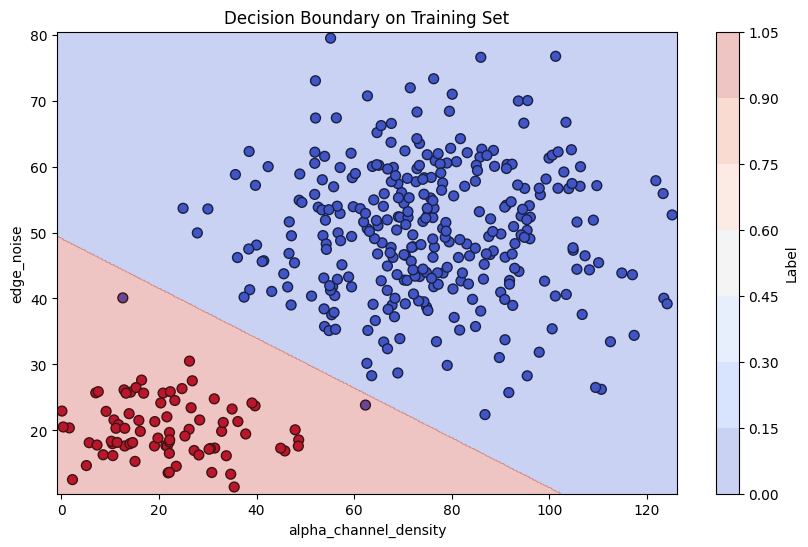

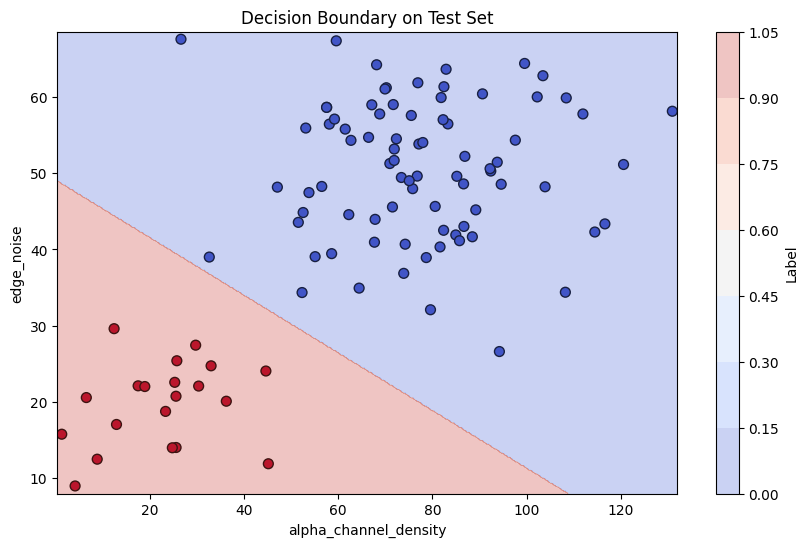

In [57]:
def plot_decision_boundary_sklearn(X, y, pipeline, title, columns):
    plt.figure(figsize=(10, 6))
    plt.scatter(
        X[columns[0]], X[columns[1]], c=y, cmap="coolwarm", edgecolors="k", s=50
    )

    # Create a grid to plot the decision boundary
    x_min, x_max = X[columns[0]].min() - 1, X[columns[0]].max() + 1
    y_min, y_max = X[columns[1]].min() - 1, X[columns[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    # Prepare grid dataframe with all columns, fill others with mean
    grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=columns)
    for col in X.columns:
        if col not in columns:
            grid[col] = X[col].mean()
    grid = grid[X.columns]  # Ensure column order matches

    Z = pipeline.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.title(title)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.colorbar(label="Label")
    plt.show()


# Example usage:
cols = ["alpha_channel_density", "edge_noise"]
plot_decision_boundary_sklearn(
    X_train, y_train, pipeline, "Decision Boundary on Training Set", cols
)
plot_decision_boundary_sklearn(
    X_test, y_test, pipeline, "Decision Boundary on Test Set", cols
)

Train Set Confusion Matrix: TN=315, FP=2, FN=0, TP=79
Train ROC AUC: 1.000
Train Precision: 0.975
Train Recall: 1.000
Train PR AUC: 1.000
Train F1 Score: 0.988

Test Set Confusion Matrix: TN=80, FP=0, FN=0, TP=20
Test ROC AUC: 1.000
Test Precision: 1.000
Test Recall: 1.000
Test PR AUC: 1.000
Test F1 Score: 1.000

As it was already mentioned, the dataset appears almost linearly separable in the alpha channel_density and edge_noise features. 
This is why a simple Logistic Regression model is used as a baseline.
Model achieves perfect scores in the test set in the ROC AUC, precision and recall metrics, and similar performance in the train set, only failing to classify 2 non fraudulent rows.

The next step is to try a more complex model, leverage the other features and tune hyperparameters to see if any marginal improvement can be achieved.

**Model suggestions:**
1. XGBoost or LightGBM with hyperparameter tuning + Logistic regression. Test also Cross Validation, as the dataset is relatively small.
2. Small neural network

**Next steps:**
1. Evaluate and compare models on ROC AUC, precision and recall and select best performing model.
2. Outline production deployment strategy.

1. Run nn.py script to check for performance of a small neural network.
2. Run sklearn_model.py script to check for performance of XGBoost model with hyperparameter tuning.
3. Compare models, save best one either pth or pickle format.


### deployment.
1. Build Script to compare multiple model architectures.
2. Save best model in terms of recall/f1 score.

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'classifier__max_depth': [3, 5, ...], 'classifier__n_estimators': [100, 200, ...]}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,steps,"[('imputer', ...), ('scaler', ...)]"


Pseudo code for deployment in flask app
1. Missing authentication and authorization
2. Load model independent of model architecture.

Note: check flask_app.py for actual implementation.

In [ ]:
# app.py
from flask import Flask, request, jsonify

# load pickle model
import joblib

loaded_model = joblib.load("../best_xgboost_model.pkl")

app = Flask(__name__)


def predict_sklearn(X):
    return loaded_model.predict(X)


@app.route("/predict", methods=["POST"])
def predict():
    data = request.json["data"]
    prediction = predict_sklearn([data])
    return jsonify({"prediction": prediction.tolist()})


if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\Users\Administrator\Code\technical_challenges\fraud_detection\.venv\Lib\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [25]:
# genrate post request using curl or using requests
import requests
import pandas as pd

url = "http://localhost:5000/predict"
data = {
    "data": {
        "edge_noise": 0.5,
        "text_density": 0.3,
        "grayscale_variance": 0.2,
        "alpha_channel_density": 0.4,
        "unique_font_colors": 5,
        "reported_income": 60000,
    }
}

print(data)
response = requests.post(url, json=data)

print(response.json())

{'data': {'edge_noise': 0.5, 'text_density': 0.3, 'grayscale_variance': 0.2, 'alpha_channel_density': 0.4, 'unique_font_colors': 5, 'reported_income': 60000}}
{'prediction': 1, 'prediction_label': 'EDITED'}
